In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
#only for colab
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras import Sequential,layers
from keras.layers import Dense,Flatten
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [28]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [29]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


3


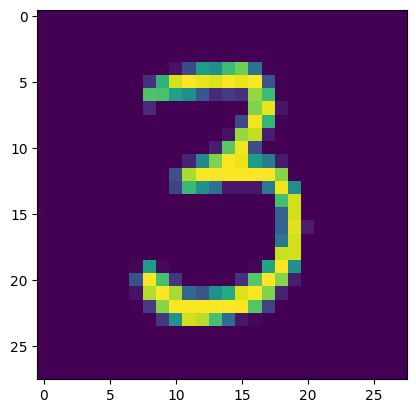

In [30]:
plt.imshow(X_train[50])
print(y_train[50])

In [31]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [32]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='sparse_categorical_crossentropy'
)

model.fit(X_train,y_train,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9575 - accuracy: 0.7913
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4365 - accuracy: 0.8927
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3646 - accuracy: 0.9114
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3255 - accuracy: 0.9204
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2980 - accuracy: 0.9278
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2687 - accuracy: 0.9333
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2471 - accuracy: 0.9370
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2197 - accuracy: 0.9438
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1969 - accuracy: 0.9472
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.179

In [34]:
loss,accuracy  = model.evaluate(X_test,y_test)
print(accuracy)

313/313 [==============================] - 4s 11ms/step - loss: 0.2290 - accuracy: 0.9442
0.9441999793052673


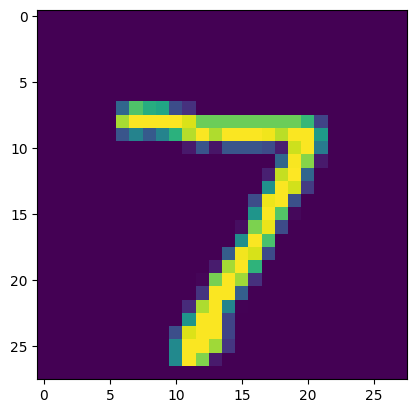

In [35]:
plt.imshow(X_test[0])


In [37]:
y_test[0]

7

In [38]:
y_pred  = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [39]:
y_pred = [np.argmax(i) for i in y_pred]
print(y_pred)

[2, 2, 1, 0, 4, 1, 4, 9, 4, 9, 0, 6, 9, 0, 1, 3, 9, 7, 3, 4, 9, 8, 0, 5, 4, 0, 1, 4, 0, 1, 3, 1, 3, 4, 7, 2, 1, 1, 3, 1, 1, 1, 4, 2, 3, 5, 1, 2, 4, 4, 0, 3, 5, 5, 6, 0, 4, 1, 9, 5, 0, 2, 9, 3, 1, 4, 6, 4, 3, 0, 1, 0, 2, 9, 1, 2, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 1, 3, 0, 1, 3, 0, 9, 3, 1, 4, 1, 1, 6, 9, 0, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 2, 4, 4, 4, 9, 2, 3, 4, 7, 0, 1, 9, 0, 5, 8, 5, 0, 5, 3, 2, 8, 1, 0, 1, 0, 4, 0, 1, 3, 1, 1, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 3, 2, 0, 3, 4, 4, 0, 5, 4, 2, 3, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 5, 1, 6, 4, 2, 3, 0, 1, 1, 1, 3, 9, 3, 2, 9, 4, 8, 9, 3, 9, 0, 3, 5, 5, 3, 7, 2, 2, 1, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 3, 8, 2, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 1, 7, 2, 8, 2, 0, 8, 5, 1, 1, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 1, 9, 2, 0, 4, 0, 0, 2, 8, 4, 1, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 0, 2, 3, 9, 7, 9, 3, 0, 4, 2, 0, 2, 1, 1, 2, 1, 

In [40]:
conf_obj = confusion_matrix(y_test,y_pred)

Text(0.5, 23.52222222222222, 'pred')

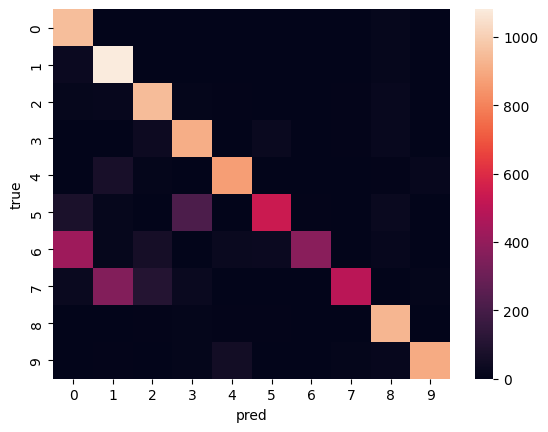

In [42]:
sns.heatmap(conf_obj)
plt.ylabel('true')
plt.xlabel('pred')

In [43]:
# predictor

In [56]:
img = "/content/Screenshot 2024-04-04 110925.png"
img = cv2.imread(img)

In [57]:
img.shape

(677, 808, 3)

In [60]:
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img = cv2.resize(img,(28,28))

In [63]:
cv2_imshow(img)

In [64]:
img = np.reshape(img,[1,28,28])

In [65]:
pred = model.predict(img)

1/1 [==============================] - 0s 41ms/step


In [67]:
print(np.argmax(pred))

8
